<a href="https://colab.research.google.com/github/RosalesLuis123/IA/blob/main/Lab4/Laboratorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Librerias:**

In [2]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# **Regresion:**

In [3]:
import pandas as pd

# Leer el conjunto de datos desde el archivo
dataset = pd.read_csv('/content/gdrive/MyDrive/Laboratorio4/dataset.txt', delimiter=',', encoding='utf-8')

# Reemplazar todos los valores NaN por 0
dataset.fillna(0, inplace=True)


dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0,0
4,92056,34377,33,19.0,0.000000,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0.0,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0,0
91711,33776,120598,66,0.0,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0,0


In [4]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separamos en X_test los datos, pero dropeando nuestra y que sería 'hospital_death'
X_test = test_dataset.drop(['hospital_death'], axis=1).values

# Separamos en y_test los datos, pero solo cargando la columna de 'hospital_death', ya que esa será nuestra y
y_test = test_dataset['hospital_death'].values

# Tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'hospital_death' para y_train
X_train = train_dataset.drop(['hospital_death'], axis=1).values
y_train = train_dataset['hospital_death'].values
m_train = len(y_train)

# Convertir 'M' a 1 y 'F' a 0 en la columna 7
X_train[:, 7] = np.where(X_train[:, 7] == 'M', 1, 0)
X_test[:, 7] = np.where(X_test[:, 7] == 'M', 1, 0)

# Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8s}{:8s}{:10s}{:10s}{:8s}{:8s}{:8s}{:8s}{:8s}{:10s}{:8s}{:12.0f}'.format(
        str(X_train[i, 72]), str(X_train[i, 5]), str(X_train[i, 3]), str(X_train[i, 7]), str(X_train[i, 17]), str(X_train[i, 75]), str(X_train[i, 76]), str(X_train[i, 77]), str(X_train[i, 78]), str(X_train[i, 79]), str(X_train[i, 80]), y_train[i]
    ))

# Mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format(len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format(len(test_dataset)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
0.01    0       86.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.02    0       72.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                1
0.0     0       36.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.06    0       60.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.02    0       27.0      0         0       0.0     0.0     0.0     1.0     0.0       0.0                0
0.11    0       71.0      0         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.0     0       35.0      0         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.13    0       75.0      0       

In [5]:
import numpy as np

# Definición de la función featureNormalize
def featureNormalize(X):
    # Creamos una copia de X para mantener los datos originales intactos
    X_norm = X.copy()


    # Calculamos el promedio de cada columna de X
    mu = np.mean(X, axis=0)

    # Calculamos la desviación estándar de cada columna de X
    sigma = np.std(X, axis=0)

    # Si alguna desviación estándar es cero, la reemplazamos con 1 para evitar divisiones por cero
    sigma[sigma == 0] = 1

    # Normalizamos los datos utilizando la fórmula (X - mu) / sigma
    X_norm = (X - mu) / sigma

    # Añadir una columna de unos al principio de la matriz X_norm
    X_norm = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

    return X_norm, mu, sigma

# Convertir 'M' a 1 y 'F' a 0 en la columna 7
X_train[:, 7] = np.where(X_train[:, 7] == 'M', 1, 0)
X_test[:, 7] = np.where(X_test[:, 7] == 'M', 1, 0)

# Normalizar las características numéricas de X_train y X_test
X_train_numeric = X_train[:, [0, 5, 4, 7, 8, 75, 76, 77,78,79,80]].astype(float)
X_test_numeric = X_test[:, [0, 5, 4, 7, 8, 75, 76, 77,78,79,80]].astype(float)

# Normalizar los datos
X_train_numeric_normalized, mu, sigma = featureNormalize(X_train_numeric)
X_test_numeric_normalized = (X_test_numeric - mu) / sigma  # Usar mu y sigma calculados en X_train para normalizar X_test
# Verifica las columnas de X_train y X_test
print("Columnas de X_train:", X_train.shape[1])
print("Columnas de X_test:", X_test.shape[1])

# Normalizar las características numéricas de X_train y X_test utilizando las mismas columnas
selected_columns = [0, 5, 4, 7, 8, 75, 76, 77, 78, 79, 80]
X_train_numeric = X_train[:, selected_columns].astype(float)
X_test_numeric = X_test[:, selected_columns].astype(float)

Columnas de X_train: 84
Columnas de X_test: 84


In [6]:
# Llamar a la función featureNormalize() para normalizar los datos de X_train
X_norm_train, mu_train, sigma_train = featureNormalize(X_train_numeric)
# Almacenar los datos normalizados en X_norm
X_norm = X_norm_train

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:12.0f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
   1.000  -0.150    -0.475     0.007   0.000   0.131  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.056    -0.475     0.867   0.000   0.126  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.826    -0.475    -0.065   0.000  -0.201  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000   0.157    -0.475    -0.622   0.000   0.602  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.969    -0.475    -0.827   0.000   0.462  -0.536  -0.114  -0.165    11.941  -0.065          -0
   1.000   0.118    -0.475    -0.690   0.000  -0.646  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.067    -0.475     0.126   0.000  -0.227  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.664    -0.475     0.1

In [7]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   1.000    -0.150    -0.475   0.007   0.000   0.131  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.056    -0.475   0.867   0.000   0.126  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.826    -0.475  -0.065   0.000  -0.201  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000     0.157    -0.475  -0.622   0.000   0.602  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.969    -0.475  -0.827   0.000   0.462  -0.536  -0.114    -0.165  11.941  -0.065
   1.000   1.000     0.118    -0.475  -0.690   0.000  -0.646  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.067    -0.475   0.126   0.000  -0.227  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.664    -0.475   0.1

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función sigmoid
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = 1 / (1 + np.exp(-z))
    return g

In [9]:
print(sigmoid(0))

0.5


In [10]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


# **Sin Normalizacion:**

In [11]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores útiles
    m = y.size  # número de ejemplos de entrenamiento

    J = 0

    # Calculamos la salida de la función sigmoide
    h = sigmoid(X.dot(theta.T))

    # Calculamos la función de costo sin regularización
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J


In [12]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # número de ejemplos de entrenamiento

    # Realiza una copia de theta, que será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history


In [13]:
# Creamos un theta con el mismo número de características que en X_ready
theta = np.zeros(X_ready.shape[1])


# Número de iteraciones será 900 y un alpha de 0.009
num_ite = 900
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
for i, tht in enumerate(theta):
    print(f"theta {i+1}: {tht}")

print("########################################################################################################")
# Mostramos el último costo, este sería el mejor costo
print(f"Con un costo de: {J_historico[-1]}")


########################################################################################################
Los valores de theta calculados son:
theta 1: -1.0053228100091478
theta 2: -1.0053228100091478
theta 3: -0.00845284735681004
theta 4: -0.13495571710029805
theta 5: -0.03642948456941935
theta 6: 0.0
theta 7: -0.03843176574590015
theta 8: -0.017389745605361866
theta 9: 0.05004886507017547
theta 10: 0.04961300424723716
theta 11: 0.03220567615561753
theta 12: 0.02516775043583001
theta 13: 0.06809871227336389
########################################################################################################
Con un costo de: 0.2940787496761962


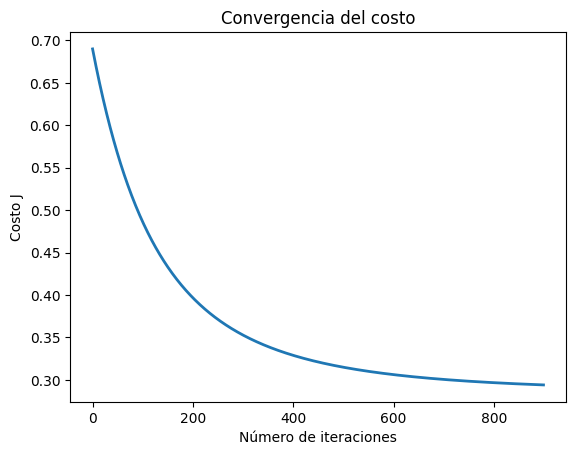

In [14]:
# Graficamos la convergencia del costo
plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.title("Convergencia del costo")
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

In [15]:
X_array = [0,0,56,0,0,1,1,1,1,1,1,1]
X_array_copy = X_array.copy()

# Normalizamos las características para la prueba, utilizando mu y sigma calculados anteriormente, comenzando desde el segundo elemento
X_array_normalized = (np.array(X_array[1:]) - mu) / sigma

# Añadimos un 1 al principio de X_array_normalized para el término de sesgo
X_array_normalized = np.concatenate([[1], X_array_normalized])

# Ajustamos theta para tener la misma longitud que X_array_normalized
theta = theta[:len(X_array_normalized)]

resultados = sigmoid(np.dot(X_array_normalized, theta))

print(f"Una persona con las características: {X_array_copy} ")
print(f'Tiene una probabilidad de morir en el hospital: {resultados * 100} %')

Una persona con las características: [0, 0, 56, 0, 0, 1, 1, 1, 1, 1, 1, 1] 
Tiene una probabilidad de morir en el hospital: 77.77172372681328 %


# **Con regularizacion:**

In [16]:
import numpy as np

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    g = 1 / (1 + np.exp(-z))
    return g


In [17]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializar algunos valores útiles
    m = y.size  # número de ejemplos de entrenamiento

    # Calcular la salida de la función sigmoide
    h = sigmoid(X.dot(theta.T))

    # Calcular la función de costo con regularización L2 (Ridge)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(theta[1:]**2)

    return J


In [18]:
def descensoGradiente(theta, X, y, alpha, lambda_, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # número de ejemplos de entrenamiento

    # Realiza una copia de theta, que será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Calcula el gradiente sin regularización
        gradient = (1 / m) * (h - y).dot(X)

        # Aplica regularización a todos los parámetros, excepto theta0 (intercepto)
        regularization_term = (lambda_ / m) * theta
        regularization_term[0] = 0  # No regularizar theta0

        # Actualiza theta utilizando el gradiente regularizado
        theta = theta - alpha * (gradient + regularization_term)

        # Calcula el costo con los parámetros actualizados
        J_history.append(calcularCosto(theta, X, y, lambda_))

    return theta, J_history


In [19]:
# Creamos un theta con el mismo número de características que en X_ready
theta = np.zeros(X_ready.shape[1])

# Número de iteraciones será 900 y un alpha de 0.009
num_ite = 900
alpha = 0.009
lambda_ = 10 # Define el parámetro de regularización (si es cero, no se aplica regularización)

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, lambda_, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
for i, tht in enumerate(theta):
    print(f"theta {i+1}: {tht}")

print("########################################################################################################")
# Mostramos el último costo, este sería el mejor costo
print(f"Con un costo de: {J_historico[-1]}")


########################################################################################################
Los valores de theta calculados son:
theta 1: -1.0055069656240214
theta 2: -1.0047317826439492
theta 3: -0.008448496103612523
theta 4: -0.13488427911111264
theta 5: -0.03641161341196305
theta 6: 0.0
theta 7: -0.038413021049517763
theta 8: -0.017380912534959866
theta 9: 0.05002435621671652
theta 10: 0.049590493715311094
theta 11: 0.03219052817862176
theta 12: 0.02515589661667225
theta 13: 0.06806638395459466
########################################################################################################
Con un costo de: 0.294164813303525


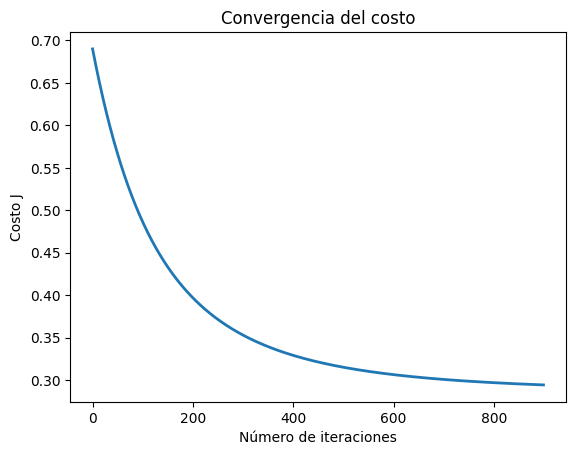

In [20]:
# Graficamos la convergencia del costo
plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.title("Convergencia del costo")
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

In [21]:
X_array = [0,0,56,0,0,1,1,1,1,1,1,1]
X_array_copy = X_array.copy()

# Normalizamos las características para la prueba, utilizando mu y sigma calculados anteriormente, comenzando desde el segundo elemento
X_array_normalized = (np.array(X_array[1:]) - mu) / sigma

# Añadimos un 1 al principio de X_array_normalized para el término de sesgo
X_array_normalized = np.concatenate([[1], X_array_normalized])

# Ajustamos theta para tener la misma longitud que X_array_normalized
theta = theta[:len(X_array_normalized)]

resultados = sigmoid(np.dot(X_array_normalized, theta))

print(f"Una persona con las características: {X_array_copy} ")
print(f'Tiene una probabilidad de morir en el hospital: {resultados * 100} %')

Una persona con las características: [0, 0, 56, 0, 0, 1, 1, 1, 1, 1, 1, 1] 
Tiene una probabilidad de morir en el hospital: 77.74735482925296 %


# **Clasificacion:**

In [22]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [23]:
import pandas as pd
import numpy as np

# Definir input_layer_size y num_labels
input_layer_size = 12
num_labels = 3

# Cargar datos desde el archivo CSV utilizando pandas
data_df = pd.read_csv('/content/gdrive/MyDrive/Laboratorio4/walmart.txt', delimiter=',')

# Seleccionar las columnas necesarias
selected_columns = ['Size', 'Unemployment', 'CPI', 'Fuel_Price', 'Temperature',
                    'Weekly_Sales', 'Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'Type']

data_df = data_df[selected_columns]

# Convertir el DataFrame de pandas a arrays de NumPy
data = data_df.to_numpy()

# Obtener características (X) y etiquetas (y)
X = data[:, :-1]  # Todas las columnas excepto la última (Type)
y = data[:, -1]  # Tomar la última columna (Type) como y

# Número de muestras
m = y.size
data_df

,Size,Unemployment,CPI,Fuel_Price,Temperature,Weekly_Sales,Dept,MarkDown1,MarkDown2,MarkDown3,Type
0,151315,8.106,211.096358,2.572,42.31,24924.50,1.0,0.00,0.00,0.0,3
1,151315,8.106,211.096358,2.572,42.31,11737.12,26.0,0.00,0.00,0.0,3
2,151315,8.106,211.096358,2.572,42.31,13223.76,17.0,0.00,0.00,0.0,3
3,151315,8.106,211.096358,2.572,42.31,37.44,45.0,0.00,0.00,0.0,3
4,151315,8.106,211.096358,2.572,42.31,1085.29,28.0,0.00,0.00,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
421565,118221,8.667,192.308899,3.882,58.85,26240.14,13.0,4018.91,58.08,100.0,2
421566,118221,8.667,192.308899,3.882,58.85,2660.02,16.0,4018.91,58.08,100.0,2
421567,118221,8.667,192.308899,3.882,58.85,4131.54,32.0,4018.91,58.08,100.0,2
421568,118221,8.667,192.308899,3.882,58.85,717.82,83.0,4018.91,58.08,100.0,2


In [24]:
print(X[0,:])
print(y)

[1.51315000e+05 8.10600000e+00 2.11096358e+02 2.57200000e+00
 4.23100000e+01 2.49245000e+04 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[3. 3. 3. ... 2. 2. 2.]


In [25]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [26]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [27]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [28]:
def displayData(X, example_width=None, figsize=(10, 10)):
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')


In [29]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

# displayData(sel)

In [30]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [31]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [32]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [48]:
lambda_ = 0.009
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

(3, 11)


In [49]:
print(all_theta)

[[-1.24380805e+01 -4.62250329e-15  1.71653403e-15 -9.29614381e-16
  -6.03146816e-15  3.48756659e-15 -3.12669488e-15 -9.05240600e-16
  -7.15797894e-15 -4.06677599e-15 -1.12429098e-15]
 [-1.26113452e+01 -7.53861627e+00  1.08261243e+00 -3.13213246e-01
   3.43819360e-01 -3.57173402e-01  3.41577207e-01  2.27230185e-02
  -2.90901280e+00 -6.25453269e-01 -8.20757601e-01]
 [-6.02154265e-01 -1.14000751e+00 -1.32155701e-01 -2.04223166e-01
   6.67696804e-02 -3.23586214e-01 -6.53909991e-02 -7.91170744e-02
   1.70933815e-01 -1.51021344e-02  2.99396109e-02]]


In [50]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [51]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[10:150, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[10:150])

(421570, 10)
Precision del conjuto de entrenamiento: 42.71%
(140, 10)
(140, 11)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


# **Sin Regularizacion:**

In [37]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [52]:
def lrCostFunction(theta, X, y):
    """
    Calcula el costo de usar theta como el parámetro para la regresión logística y
    el gradiente del costo con respecto a los parámetros.

    Parameters
    ----------
    theta : array_like
        Parámetro theta para la regresión logística. Vector de forma (n, ), donde n es el número de características.

    X : array_like
        Dataset con forma (m x n). m es el número de ejemplos, y n es el número de
        características.

    y : array_like
        Las etiquetas. Un vector con forma (m, ), donde m es el número de ejemplos.

    Returns
    -------
    J : float
        El valor calculado para la función de costo regularizada.

    grad : array_like
        Un vector de forma (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta.
    """
    m = y.size

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [53]:
def oneVsAll(X, y, num_labels):
    """
    Entrena clasificadores de regresión logística num_labels y devuelve
    cada uno de estos clasificadores en una matriz all_theta, donde la i-ésima
    fila de all_theta corresponde al clasificador para la etiqueta i.

    Parameters
    ----------
    X : array_like
        El conjunto de datos de entrada con forma (m x n). m es el número de
        puntos de datos, y n es el número de características.

    y : array_like
        Las etiquetas de los datos. Un vector con forma (m, ).

    num_labels : int
        Número de etiquetas posibles.

    Returns
    -------
    all_theta : array_like
        Los parámetros entrenados para la regresión logística para cada clase.
        Esta es una matriz de forma (K x n) donde K es el número de clases
        (es decir, `num_labels`) y n es el número de características.
    """
    from scipy import optimize

    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar una columna de unos a X para el término de sesgo
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        res = optimize.minimize(lrCostFunction, initial_theta,
                                (X, (y == c)), jac=True, method='CG',
                                options={'maxiter': 50, 'disp': False})
        all_theta[c, :] = res.x

    return all_theta

In [55]:
all_theta = oneVsAll(X, y, num_labels)
print(all_theta.shape)


(3, 11)


In [56]:
print(all_theta)

[[-1.24380805e+01 -4.62250329e-15  1.71653403e-15 -9.29614381e-16
  -6.03146816e-15  3.48756659e-15 -3.12669488e-15 -9.05240600e-16
  -7.15797894e-15 -4.06677599e-15 -1.12429098e-15]
 [-1.26113452e+01 -7.53861627e+00  1.08261243e+00 -3.13213246e-01
   3.43819360e-01 -3.57173402e-01  3.41577207e-01  2.27230185e-02
  -2.90901280e+00 -6.25453269e-01 -8.20757601e-01]
 [-6.02154265e-01 -1.14000751e+00 -1.32155701e-01 -2.04223166e-01
   6.67696804e-02 -3.23586214e-01 -6.53909991e-02 -7.91170744e-02
   1.70933815e-01 -1.51021344e-02  2.99396109e-02]]


In [57]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parameters
    ----------
    all_theta : array_like
        Los parámetros entrenados para la regresión logística para cada clase.
        Esta es una matriz de forma (K x n+1) donde K es el número de clases
        (es decir, `numlabels`) y n es el número de características sin el término de sesgo.

    X : array_like
        Los puntos de datos para predecir sus etiquetas. Esta es una matriz de forma
        (m x n) donde m es el número de puntos de datos a predecir, y n es el número
        de características sin el término de sesgo. Tenga en cuenta que agregamos el término de sesgo a X en
        esta función.

    Returns
    -------
    p : array_like
        Las predicciones para cada punto de datos en X. Esta es una matriz de forma (m, ).
    """
    m = X.shape[0]
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Agregar una columna de unos a X para el término de sesgo
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Calcular las predicciones
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

    return p


In [58]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[10:150, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[10:150])

(421570, 10)
Precision del conjuto de entrenamiento: 42.71%
(140, 10)
(140, 11)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
